In [1]:
import sys
sys.path.append('../src/')

import itertools

%load_ext autoreload
%autoreload 2

from transfer_learning import *

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
directory = '/cluster/tufts/hugheslab/eharve06/encoded_Dataset_BUSI_with_GT/'
# [normal, benign, malignant]
columns = ['n', 'random_state', 'train_BA', 'train_auroc', 'val_BA', 'val_auroc', 'test_BA', 'test_auroc']
df = pd.DataFrame(columns=columns)
ns = [200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600]
random_states = [1001, 2001, 3001]
for model_index, (n, random_state) in enumerate(itertools.product(ns, random_states)):
    train_BA, train_auroc, val_BA, val_auroc, test_BA, test_auroc = train_and_tune(directory, n, random_state)
    row = [n, random_state, train_BA, train_auroc, val_BA, val_auroc, test_BA, test_auroc]
    df.loc[model_index] = row
    print(df.loc[model_index])
df.to_csv('/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/experiments/Breast_Ultrasound_Dataset_short_range.csv')

In [ ]:
directory = '/cluster/tufts/hugheslab/eharve06/encoded_chest_xray/'
# [normal, pneumonia]
columns = ['n', 'random_state', 'train_BA', 'train_auroc', 'val_BA', 'val_auroc', 'test_BA', 'test_auroc']
df = pd.DataFrame(columns=columns)
ns = [200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600]
ns = [200, 240, 280, 320, 360, 800, 1600, 3200]
random_states = [1001, 2001, 3001]
for model_index, (n, random_state) in enumerate(itertools.product(ns, random_states)):
    train_BA, train_auroc, val_BA, val_auroc, test_BA, test_auroc = train_and_tune(directory, n, random_state)
    row = [n, random_state, train_BA, train_auroc, val_BA, val_auroc, test_BA, test_auroc]
    df.loc[model_index] = row
    print(df.loc[model_index])
df.to_csv('/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/experiments/chest_xray_long_range.csv')

In [2]:
def load_experiment(path):
    df = pd.read_csv(path, index_col='Unnamed: 0')
    df.train_BA = df.train_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    df.train_auroc = df.train_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    df.val_BA = df.val_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    df.val_auroc = df.val_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    df.test_BA = df.test_BA.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    df.test_auroc = df.test_auroc.apply(lambda string: np.fromstring(string[1:-1], sep=' '))
    return df

In [3]:
df = load_experiment('/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/experiments/Breast_Ultrasound_Dataset_short_range.csv')
df.head()

,n,random_state,train_BA,train_auroc,val_BA,val_auroc,test_BA,test_auroc
0,200,1001,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.84643735, 0.76895206, 0.82362155]","[0.87100737, 0.81215162, 0.87531328]","[0.84482759, 0.73948949, 0.83734403]","[0.94367816, 0.81456456, 0.89037433]"
1,200,2001,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.88474295, 0.75694444, 0.89213564]","[0.92703151, 0.79388889, 0.92712843]","[0.85504202, 0.71645022, 0.73744113]","[0.8487395, 0.84776335, 0.8744113]"
2,200,3001,"[1.0, 0.99122807, 1.0]","[1.0, 0.99877601, 1.0]","[0.91448692, 0.78142857, 0.8984375]","[0.9305835, 0.82, 0.95684524]","[0.74315068, 0.65646259, 0.84048507]","[0.94901065, 0.83965015, 0.93283582]"
3,240,1001,"[0.98550725, 0.99125619, 0.96721311]","[0.99809691, 0.99963567, 0.99322282]","[0.85995086, 0.76978818, 0.84962406]","[0.86486486, 0.80824972, 0.88533835]","[0.9137931, 0.70983483, 0.76247772]","[0.95402299, 0.85135135, 0.89215686]"
4,240,2001,"[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.9274461, 0.79861111, 0.90692641]","[0.94941957, 0.82111111, 0.95598846]","[0.87710084, 0.76839827, 0.73861852]","[0.85504202, 0.84704185, 0.87990581]"


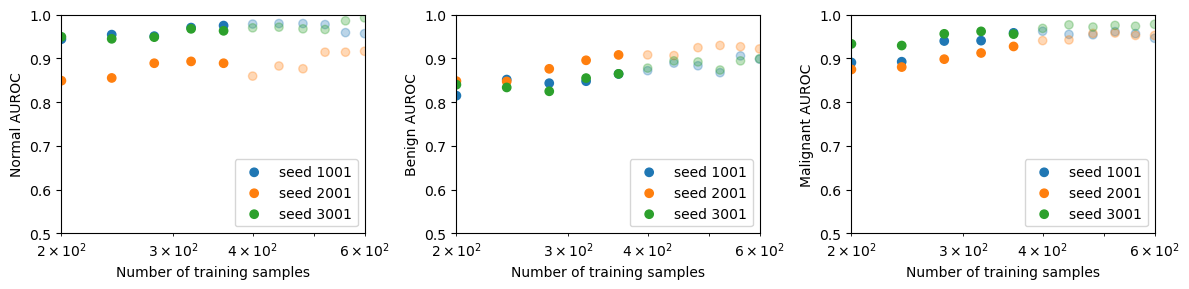

In [4]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 3))
labels = ['Normal', 'Benign', 'Malignant']
alphas = [1,1,1,1,1,0.3,0.3,0.3,0.3,0.3,0.3]
for index in range(3):
    axs[index].scatter(df.n[df.random_state==1001].to_numpy(), \
                       np.array(df.test_auroc[df.random_state==1001].to_list())[:,index], label='seed 1001', alpha=alphas)
    axs[index].scatter(df.n[df.random_state==2001].to_numpy(), \
                       np.array(df.test_auroc[df.random_state==2001].to_list())[:,index], label='seed 2001', alpha=alphas)
    axs[index].scatter(df.n[df.random_state==3001].to_numpy(), \
                       np.array(df.test_auroc[df.random_state==3001].to_list())[:,index], label='seed 3001', alpha=alphas)
    axs[index].set_xlim([200, 600])
    axs[index].set_ylim([0.5, 1.0])
    axs[index].set_xscale('log')
    axs[index].set_xlabel('Number of training samples')
    axs[index].set_ylabel('{} AUROC'.format(labels[index]))
    axs[index].legend(loc='lower right')
fig.tight_layout()
plt.show()

In [5]:
df = load_experiment('/cluster/home/eharve06/extrapolating-classifier-accuracy-to-bigger-datasets/experiments/Chest_X-Ray_short_range.csv')
df.head()

,n,random_state,train_BA,train_auroc,val_BA,val_auroc,test_BA,test_auroc
0,200,1001,"[1.0, 0.96900161, 0.96503497]","[1.0, 0.99446457, 0.99349773]","[0.91132752, 0.80852405, 0.75411353]","[0.97250778, 0.86678294, 0.80226561]","[0.90266733, 0.80076741, 0.74460586]","[0.96981208, 0.87501342, 0.79850686]"
1,200,2001,"[0.98518519, 0.93115942, 0.85920604]","[0.99920228, 0.97624799, 0.9265294]","[0.93426928, 0.80711681, 0.76757612]","[0.98373431, 0.88096055, 0.81799521]","[0.91095551, 0.77722222, 0.71321752]","[0.97729299, 0.85448029, 0.80750637]"
2,200,3001,"[0.96852061, 0.90418048, 0.92066472]","[0.9904009, 0.94472917, 0.96759839]","[0.89192288, 0.7501212, 0.7088743]","[0.96247636, 0.82429703, 0.75185872]","[0.90130996, 0.80558018, 0.73271138]","[0.97729045, 0.88510039, 0.80518111]"
3,240,1001,"[0.95901639, 0.85639751, 0.86302521]","[0.99294807, 0.93157784, 0.92302521]","[0.90370082, 0.81164706, 0.74609214]","[0.9693543, 0.86704221, 0.79519349]","[0.90072659, 0.79909484, 0.74301184]","[0.96643946, 0.87733891, 0.81237557]"
4,240,2001,"[0.95407951, 0.84195804, 0.85134376]","[0.98949912, 0.92293706, 0.91459875]","[0.92896283, 0.81968474, 0.74630802]","[0.98038221, 0.88364143, 0.80490934]","[0.89573769, 0.79967742, 0.70381442]","[0.97436998, 0.87540024, 0.80080253]"


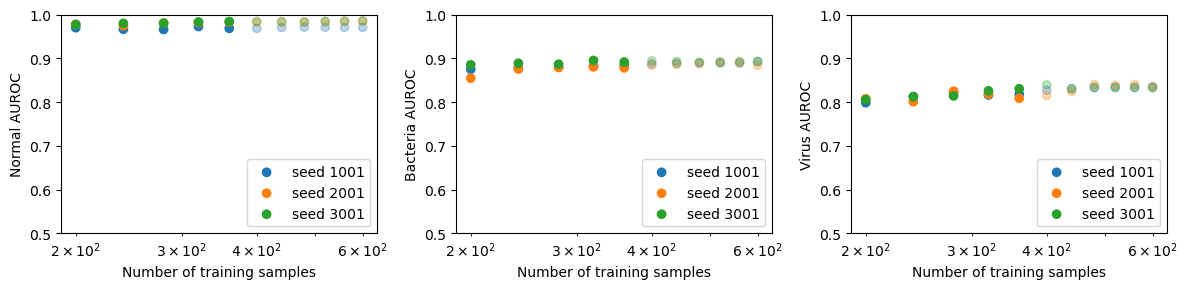

In [6]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 3))
labels = ['Normal', 'Bacteria', 'Virus']
alphas = [1,1,1,1,1,0.3,0.3,0.3,0.3,0.3,0.3]
for index in range(3):
    axs[index].scatter(df.n[df.random_state==1001].to_numpy(), \
                       np.array(df.test_auroc[df.random_state==1001].to_list())[:,index], label='seed 1001', alpha=alphas)
    axs[index].scatter(df.n[df.random_state==2001].to_numpy(), \
                       np.array(df.test_auroc[df.random_state==2001].to_list())[:,index], label='seed 2001', alpha=alphas)
    axs[index].scatter(df.n[df.random_state==3001].to_numpy(), \
                       np.array(df.test_auroc[df.random_state==3001].to_list())[:,index], label='seed 3001', alpha=alphas)
    axs[index].set_ylim([0.5, 1.0])
    axs[index].set_xscale('log')
    axs[index].set_xlabel('Number of training samples')
    axs[index].set_ylabel('{} AUROC'.format(labels[index]))
    axs[index].legend(loc='lower right')
fig.tight_layout()
plt.show()